In [1]:
# import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data into dataframe
df = pd.read_csv('/Users/mike/vcs/github.com/frostyotter/data/credit_customers.csv')
# quick glance at first 5 rows
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [4]:
def object_type_checkin(df_col: df.columns) -> bool:
    """ 
    Pass in a dataframe with 1 column then return a True/False
    """
    if df_col.dtype =='object':
        return True
    else: False

def print_unique(dfin: pd.DataFrame) -> str:
    """ 
    Pass in a dataframe,
    return by printing unique values of each object column
    ----
    parameters:
    dfin: pd.dataframe
    """
    for col in dfin.columns:
        if object_type_checkin(df[col]):
            
            print(f'{col}, {dfin[col].dtype} \n {pd.unique(dfin[col])}')

In [5]:
def dummies_col(dfin: pd.DataFrame, col_name: list) -> pd.DataFrame:
    """Pass in a dataframe and column name that need to get one-hot-encoding
    ----
    parameters:
    dfin: pd.dataframe
    col_name: list of string column name that need to one hot encoding
    return: dataframe with column one-hot-number name
    """
    dfout = pd.DataFrame(columns=dfin.columns)
    for col in col_name:
        dfout = pd.get_dummies(dfin,columns=col_name)
    return dfout

<AxesSubplot:xlabel='class', ylabel='count'>

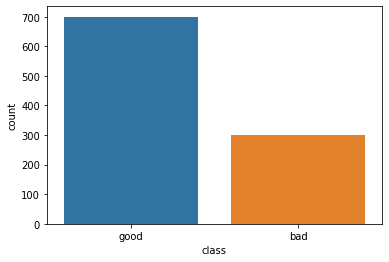

In [6]:
# sanity check label
sns.countplot(x= 'class', data=df)

In [7]:
print_unique(df)

checking_status, object 
 ['<0' '0<=X<200' 'no checking' '>=200']
credit_history, object 
 ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']
purpose, object 
 ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']
savings_status, object 
 ['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']
employment, object 
 ['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']
personal_status, object 
 ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']
other_parties, object 
 ['none' 'guarantor' 'co applicant']
property_magnitude, object 
 ['real estate' 'life insurance' 'no known property' 'car']
other_payment_plans, object 
 ['none' 'bank' 'stores']
housing, object 
 ['own' 'for free' 'rent']
job, object 
 ['skilled' 'unskilled resident' 'high qualif/self emp/mgmt'
 'unemp/unskilled non res']
own_telephone, object 
 ['yes' 'none']
foreign_worker, ob

In [8]:
def plot_object_cols(dfin: pd.DataFrame) -> plt.plot:
    """
    Pass in a dataframe,
    return count plot of column type object
    ----
    parameter:
    dfin: pd.dataframe
    """
    # init figure for subplotting
    fig = plt.figure(figsize=(15, 30))
    n_col = 2
    n_row = int(len(df.columns)/2)
    idx = 1
    for col in dfin.columns:
        if object_type_checkin(dfin[col]):
            ax= fig.add_subplot(n_row, n_col, idx)
            sns.countplot(x = col, data=dfin, hue='class', ax=ax)
            idx+=1

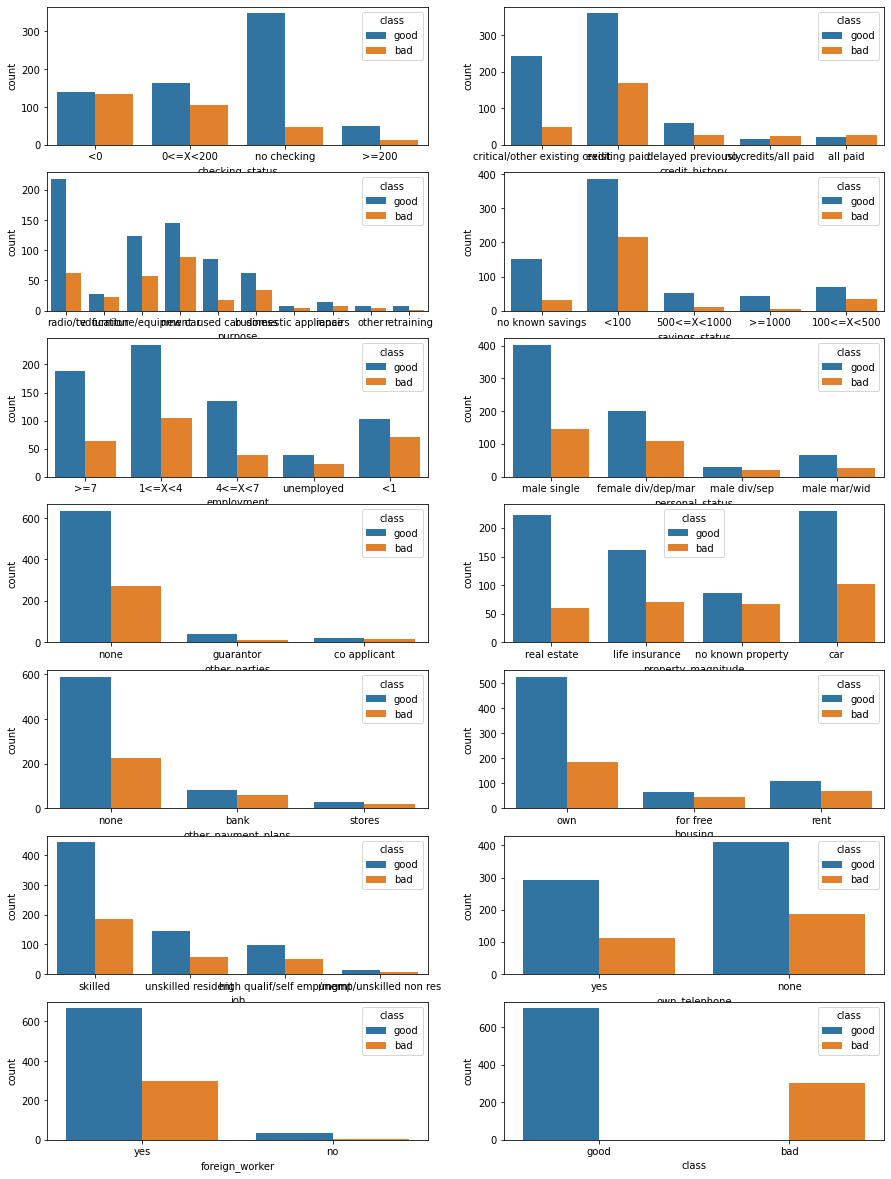

In [9]:
plot_object_cols(df)

mostly are from good class, make sense since good class has 2 times more than bad class

In [10]:
# so by default, we are going with just label encoder and one-hot
# checking model doing well with data
# then go back to adjust the data and repeat
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import ensemble
import xgboost as xgb

In [11]:
# one-hot encoding these
oh_c = ['credit_history', 'purpose','personal_status','other_parties','property_magnitude']
# labeling encoding these
lbl_c = [x for x in df.columns if object_type_checkin(df[x]) and x not in oh_c]
# scaling these
scaling_c = [x for x in df.columns if x not in oh_c and x not in lbl_c]
df = dummies_col(df, oh_c)

In [12]:
def lbl_col(dfin: pd.DataFrame, col_name:list) -> pd.DataFrame:
    """ 
    Pass in dataframe and column names that need to label encoding
    return new dataframe with column encoded
    ----
    parameters:
    dfin: pd.DataFrame
    col_name: list of column names
    """
    for col in col_name:
        lbl_enc = preprocessing.LabelEncoder()
        dfin.loc[:, col] = lbl_enc.fit_transform(dfin[col].values)
    return dfin

In [13]:
df = lbl_col(df, lbl_c)

In [14]:
df.head()

,checking_status,duration,credit_amount,savings_status,employment,installment_commitment,residence_since,age,other_payment_plans,housing,...,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,other_parties_co applicant,other_parties_guarantor,other_parties_none,property_magnitude_car,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate
0,1,6.0,1169.0,4,3,4.0,4.0,67.0,1,1,...,0,0,1,0,0,1,0,0,0,1
1,0,48.0,5951.0,2,0,2.0,2.0,22.0,1,1,...,0,0,0,0,0,1,0,0,0,1
2,3,12.0,2096.0,2,1,2.0,3.0,49.0,1,1,...,0,0,1,0,0,1,0,0,0,1
3,1,42.0,7882.0,2,1,2.0,4.0,45.0,1,0,...,0,0,1,0,1,0,0,1,0,0
4,1,24.0,4870.0,2,0,3.0,4.0,53.0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [15]:
# normalize data
def normalize_col(dfin: pd.DataFrame, col_name: list)-> pd.DataFrame:
    """ 
    Pass in dataframe that reprocessed into number,
     return dataframe that already normalization by standard scaler
     ----
     parameter:
     dfin: dataframe
     col_name: list column names that need to do standard scaling
    """
 
    standar_scl = preprocessing.StandardScaler()
    dfin.loc[:, col_name] = standar_scl.fit_transform(dfin[col_name].values)
    return dfin


In [16]:
df = normalize_col(df, scaling_c)

In [17]:
def get_kfold(dfin: pd.DataFrame, stratified = True) -> pd.DataFrame:
    """ 
    Pass in dataframe return dataframe with kfold
    ----
    parameters:
    dfin: dataframe that need to kfold
    stratified: bool, default True
    """
    dfout = dfin.copy()
    if stratified:
        # since the label count did not balanced, we are going to use stratified cross validation
        # create a kfold to mark and prefill it with -1
        dfout['kfold'] = -1
        # randomize the rows of data
        #dfout = dfout.sample(frac=1).reset_index(drop=True)
        y = dfout['class'].values
        # init stratified cross validation
        kf = model_selection.StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
        # fill the new kfold number
        for f, (t_, v_) in enumerate(kf.split(X=dfout, y=y)):
            dfout.loc[v_,'kfold'] = f
        # f stand for fold number
        # t_ stand for train number
        # v_ stand for validation number
        return dfout
    if not stratified:
        dfout['kfold'] = -1
        # randomize the rows of data
        #dfout = dfout.sample(frac=1).reset_index(drop=True)
        # init stratified cross validation
        kf = model_selection.KFold(n_splits=5,shuffle=True, random_state=42)
        # fill the new kfold number
        for f, (t_, v_) in enumerate(kf.split(X=dfout)):
            dfout.loc[v_,'kfold'] = f
        return dfout

In [18]:
from sklearn import linear_model
from sklearn import metrics

In [21]:
def get_model(model_name: str):
    """ 
    Pass in name of model then return the model that has been initialized
    ----
    parameter:
    model_name: 'str', lr - rf - xgb
    """
    if model_name == 'lr':
        return linear_model.LogisticRegression()
    elif model_name == 'rf':
        return ensemble.RandomForestClassifier(n_jobs=-1)
    elif model_name == 'xgb':
        return xgb.XGBClassifier(n_jobs= -1, max_depth=7, n_estimators=200)
    else: print('not supported model')


def run_cls(fold:int, model_name: str, dfin: pd.DataFrame, stratified = True)-> float:
    """ 
    Pass in fold number (int), and model name and dataset the function will train and return results from metrics
    ----
    parameters:
    fold: number int
    model: string, model name:
        - lr: logistic regression
        - rf: random forest
        - xgb: xgboostree
    df: pd.DataFrame with kfold column
    stratified: bool, default True
    """
    #get kfold dataframe
    dfout = get_kfold(dfin,stratified = stratified )
    # split to train and validation dataset
    df_train = dfout[dfout.kfold != fold].reset_index(drop=True)
    df_valid = dfout[dfout.kfold == fold].reset_index(drop=True)

    # get X for training and validation
    X_train, X_valid = df_train.drop(['class', 'kfold'], axis = 1).values, df_valid.drop(['class', 'kfold'], axis = 1).values
    # init model
    
    model = get_model(model_name=model_name)
    model.fit(X_train, df_train['class'].values )

    # predict on validation data
    # use metrics AUC
    valid_preds =  model.predict_proba(X_valid)[:, 1]
    # roc auc score
    auc = metrics.roc_auc_score(df_valid['class'].values, valid_preds)

    # print out results
    print(f'fold: {fold}, auc score: {auc}')

In [22]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
# warnings.filterwarnings('ignore')
    for fold in range(5):
        run_cls(fold, 'lr', df)

fold: 0, auc score: 0.7550000000000001
fold: 1, auc score: 0.7279761904761904
fold: 2, auc score: 0.7608333333333333
fold: 3, auc score: 0.8317857142857142
fold: 4, auc score: 0.7579761904761905


Quite good for a logistic regression model  
next, we'll try random forest

In [23]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for fold in range(5):
        run_cls(fold, 'rf', df)

fold: 0, auc score: 0.7983928571428571
fold: 1, auc score: 0.7445238095238095
fold: 2, auc score: 0.7686309523809524
fold: 3, auc score: 0.8153571428571428
fold: 4, auc score: 0.770297619047619


The score seem to increase just a little bit  
how about boosting model

In [24]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for fold in range(5):
        run_cls(fold, 'xgb', df)

fold: 0, auc score: 0.7667857142857143
fold: 1, auc score: 0.7419047619047618
fold: 2, auc score: 0.7744047619047619
fold: 3, auc score: 0.7830952380952382
fold: 4, auc score: 0.8036904761904761


The score seem worse

Our best model so far is random forest, we are going to play with it for a bit

In [25]:
# reload the data since we messed it
df = pd.read_csv('/Users/mike/vcs/github.com/frostyotter/data/credit_customers.csv')
# one-hot encoding object columns
oh_c = [x for x in df.columns if object_type_checkin(df[x]) and x not in ('class')]
scaling_c = [x for x in df.columns if x not in oh_c and x not in ('class')]
print(oh_c)

['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']


In [26]:
df = dummies_col(df, oh_c)
df = normalize_col(df, scaling_c)

In [27]:
df

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class,checking_status_0<=X<200,checking_status_<0,...,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,good,0,1,...,1,0,0,1,0,0,0,1,0,1
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,bad,1,0,...,1,0,0,1,0,0,1,0,0,1
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,good,0,0,...,1,0,0,0,0,1,1,0,0,1
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,good,0,1,...,0,0,0,1,0,0,1,0,0,1
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,bad,0,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.738668,-0.544162,0.024147,1.046987,-0.399832,-0.704926,-0.428290,good,0,0,...,1,0,0,0,0,1,1,0,0,1
996,0.754763,0.207612,0.918477,1.046987,0.391740,-0.704926,-0.428290,good,0,1,...,1,0,1,0,0,0,0,1,0,1
997,-0.738668,-0.874503,0.918477,1.046987,0.215835,-0.704926,-0.428290,good,0,0,...,1,0,0,1,0,0,1,0,0,1
998,1.999289,-0.505528,0.918477,1.046987,-1.103451,-0.704926,-0.428290,bad,0,1,...,0,0,0,1,0,0,0,1,0,1


In [28]:
target_mapping = {'good':1, 'bad':0}
df.loc[:, 'class'] = df['class'].map(target_mapping)

In [29]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for fold in range(5):
        run_cls(fold, 'rf', df, stratified=True)

fold: 0, auc score: 0.7832142857142858
fold: 1, auc score: 0.754345238095238
fold: 2, auc score: 0.7639285714285715
fold: 3, auc score: 0.8217857142857142
fold: 4, auc score: 0.7820238095238096


The score increased by a little

In [30]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for fold in range(5):
        run_cls(fold, 'xgb', df, stratified=True)

fold: 0, auc score: 0.7403571428571428
fold: 1, auc score: 0.7561904761904762
fold: 2, auc score: 0.7541666666666667
fold: 3, auc score: 0.794047619047619
fold: 4, auc score: 0.7871428571428573


Try features engineering

In [31]:
# reload the data since we messed it
df = pd.read_csv('/Users/mike/vcs/github.com/frostyotter/data/credit_customers.csv')
# get numeric columns
num_cols = [x for x in df.columns if not object_type_checkin(df[x])]
categorical_cols = [x for x in df.columns if object_type_checkin(df[x]) and x not in ('class')]

In [33]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   duration                1000 non-null   float64
 1   credit_amount           1000 non-null   float64
 2   installment_commitment  1000 non-null   float64
 3   residence_since         1000 non-null   float64
 4   age                     1000 non-null   float64
 5   existing_credits        1000 non-null   float64
 6   num_dependents          1000 non-null   float64
dtypes: float64(7)
memory usage: 54.8 KB


In [34]:
df[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   checking_status      1000 non-null   object
 1   credit_history       1000 non-null   object
 2   purpose              1000 non-null   object
 3   savings_status       1000 non-null   object
 4   employment           1000 non-null   object
 5   personal_status      1000 non-null   object
 6   other_parties        1000 non-null   object
 7   property_magnitude   1000 non-null   object
 8   other_payment_plans  1000 non-null   object
 9   housing              1000 non-null   object
 10  job                  1000 non-null   object
 11  own_telephone        1000 non-null   object
 12  foreign_worker       1000 non-null   object
dtypes: object(13)
memory usage: 101.7+ KB


In [35]:
import itertools

def feature_engineering(dfin: pd.DataFrame, cat_col:list)->pd.DataFrame:
    """ 
    Pass in dataframe, list categorical column names, 
    return dataframe with new features
    for example: list(itertools.combinations([1, 2, 3], 2)) will return
    [(1, 2), (1, 3), (2, 3)]
    ---
    parameters:
    dfin: dataframe
    cat_col: list string
    """
    
    combi = list(itertools.combinations(cat_col, 2))
    for c1, c2 in combi:
        dfin.loc[
            :,
            c1+"_"+c2
        ]= df[c1].astype(str)+"_"+df[c2].astype(str)
    return dfin

In [36]:
df = feature_engineering(df, categorical_cols)
df = normalize_col(df, num_cols)
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,other_payment_plans_housing,other_payment_plans_job,other_payment_plans_own_telephone,other_payment_plans_foreign_worker,housing_job,housing_own_telephone,housing_foreign_worker,job_own_telephone,job_foreign_worker,own_telephone_foreign_worker
0,<0,-1.236478,critical/other existing credit,radio/tv,-0.745131,no known savings,>=7,0.918477,male single,none,...,none_own,none_skilled,none_yes,none_yes,own_skilled,own_yes,own_yes,skilled_yes,skilled_yes,yes_yes
1,0<=X<200,2.248194,existing paid,radio/tv,0.949817,<100,1<=X<4,-0.870183,female div/dep/mar,none,...,none_own,none_skilled,none_none,none_yes,own_skilled,own_none,own_yes,skilled_none,skilled_yes,none_yes
2,no checking,-0.738668,critical/other existing credit,education,-0.416562,<100,4<=X<7,-0.870183,male single,none,...,none_own,none_unskilled resident,none_none,none_yes,own_unskilled resident,own_none,own_yes,unskilled resident_none,unskilled resident_yes,none_yes
3,<0,1.750384,existing paid,furniture/equipment,1.634247,<100,4<=X<7,-0.870183,male single,guarantor,...,none_for free,none_skilled,none_none,none_yes,for free_skilled,for free_none,for free_yes,skilled_none,skilled_yes,none_yes
4,<0,0.256953,delayed previously,new car,0.566664,<100,1<=X<4,0.024147,male single,none,...,none_for free,none_skilled,none_none,none_yes,for free_skilled,for free_none,for free_yes,skilled_none,skilled_yes,none_yes


that's a lots of columns

In [37]:
target_mapping = {'good':1, 'bad':0}
df.loc[:, 'class'] = df['class'].map(target_mapping)

# label encoding categorical columns
new_cat_cols = [x for x in df.columns if x not in num_cols and x not in ('class')]
df = lbl_col(df, new_cat_cols)
df = normalize_col(df, num_cols)


In [38]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for fold in range(5):
        run_cls(fold, 'rf', df, stratified=True)

fold: 0, auc score: 0.7897619047619048
fold: 1, auc score: 0.7394642857142857
fold: 2, auc score: 0.7455952380952381
fold: 3, auc score: 0.8050595238095237
fold: 4, auc score: 0.7571428571428571


In [39]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for fold in range(5):
        run_cls(fold, 'xgb', df, stratified=True)

fold: 0, auc score: 0.7388095238095239
fold: 1, auc score: 0.7269047619047619
fold: 2, auc score: 0.759047619047619
fold: 3, auc score: 0.805595238095238
fold: 4, auc score: 0.7813095238095238


The score did not improved since we used label encoding, maybe onehot encoding would help  
but that would create more columns